In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#importing tools which we are going to use them.

In [2]:
df = pd.read_csv('C:/Users/Mert/Downloads/cs_go_data.csv', encoding='latin-1')
#reading our data.


In [3]:
df.head() #observe a few values

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
(df["ct_score"] > 16).sum()

1941

In [5]:
df.shape

(122410, 97)

In [6]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [8]:
df.count()

time_left                    122410
ct_score                     122410
t_score                      122410
map                          122410
bomb_planted                 122410
                              ...  
ct_grenade_molotovgrenade    122410
t_grenade_molotovgrenade     122410
ct_grenade_decoygrenade      122410
t_grenade_decoygrenade       122410
round_winner                 122410
Length: 97, dtype: int64

In [9]:
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

<AxesSubplot:xlabel='round_winner', ylabel='Count'>

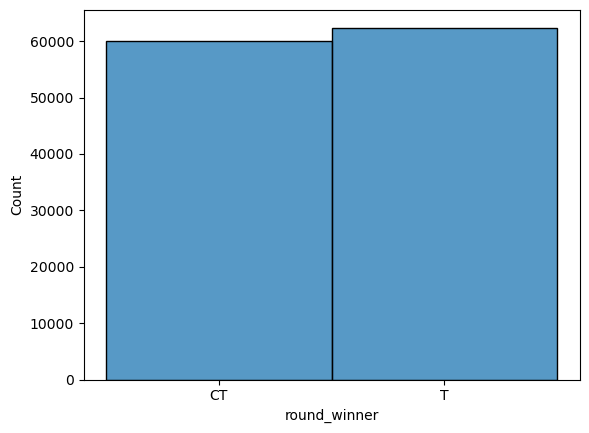

In [10]:
sn.histplot(data=df, x = 'round_winner') #drop a histogram of round winner

In [11]:
sn.set(rc={'figure.figsize':(10,8)})


<AxesSubplot:ylabel='time_left'>

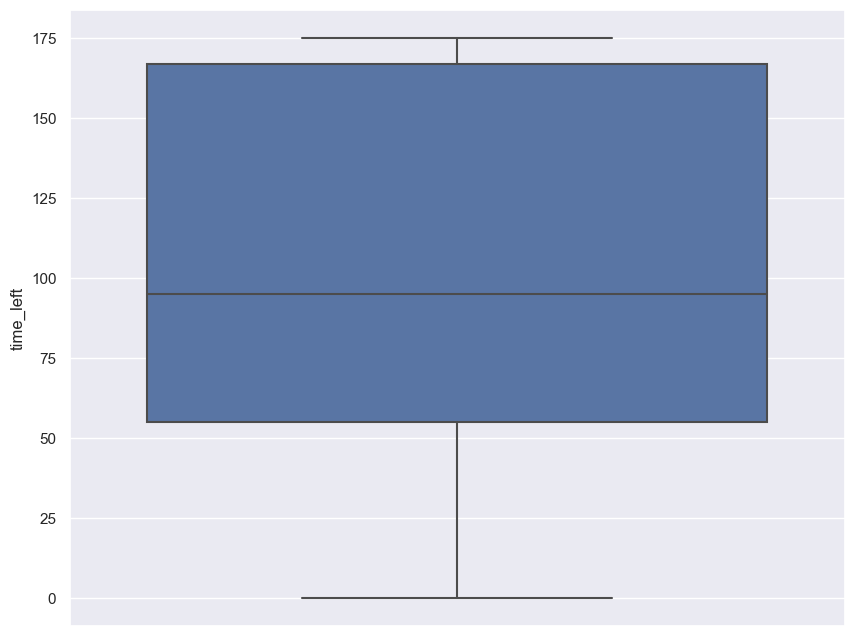

In [12]:
sn.boxplot(y='time_left', data=df)


In [13]:
def moneywin(df):
    count=0
    for case in range(df.shape[0]):
        if df.loc[case][9]>=df.loc[case][10]:
            if df.loc[case][-1]=='CT':
                count+=1
        else:
            if df.loc[case][-1]=='T':
                count+=1
            
    return count

In [15]:
df.loc[0]


time_left                       175.0
ct_score                          0.0
t_score                           0.0
map                          de_dust2
bomb_planted                    False
                               ...   
ct_grenade_molotovgrenade         0.0
t_grenade_molotovgrenade          0.0
ct_grenade_decoygrenade           0.0
t_grenade_decoygrenade            0.0
round_winner                       CT
Name: 0, Length: 97, dtype: object

In [16]:
(df['ct_money'] >=df['t_money']).value_counts()

False    64957
True     57453
dtype: int64

In [18]:
df['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [19]:
(df['ct_money'] < df['t_money']).value_counts()

True     64957
False    57453
dtype: int64

In [20]:
(df['ct_money'] >= df['t_money'])&(df['round_winner']=='CT')

0          True
1         False
2          True
3          True
4          True
          ...  
122405    False
122406    False
122407    False
122408    False
122409    False
Length: 122410, dtype: bool

In [21]:
(df['ct_money'] >= df['t_money'])&(df['round_winner']=='T')

0         False
1         False
2         False
3         False
4         False
          ...  
122405    False
122406    False
122407    False
122408    False
122409    False
Length: 122410, dtype: bool

In [22]:
(df['ct_money'] >= df['t_money'])&(df['round_winner']=='T').value_counts()

0         False
False     False
1         False
True      False
2         False
          ...  
122405    False
122406    False
122407    False
122408    False
122409    False
Length: 122412, dtype: bool

In [24]:
(df['ct_money'] >= df['t_money'])&(df['round_winner']=='CT').value_counts()

0         False
1         False
2         False
3         False
4         False
          ...  
122405    False
122406    False
122407    False
122408    False
122409    False
Length: 122410, dtype: bool

In [25]:
((df['ct_money']>=df['t_money']) & (df['round_winner']=='CT')).value_counts()

False    87750
True     34660
dtype: int64

In [26]:
((df['ct_money']>=df['t_money']) & (df['round_winner']=='T')).value_counts()

False    99617
True     22793
dtype: int64

<AxesSubplot:ylabel='ct_score'>

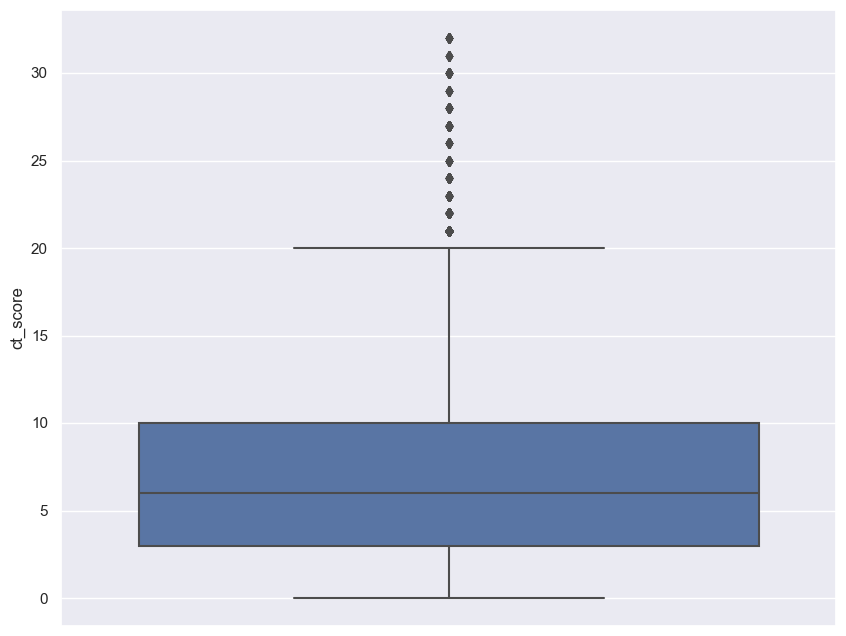

In [27]:
sn.boxplot(y='ct_score', data=df)

<AxesSubplot:xlabel='map', ylabel='Count'>

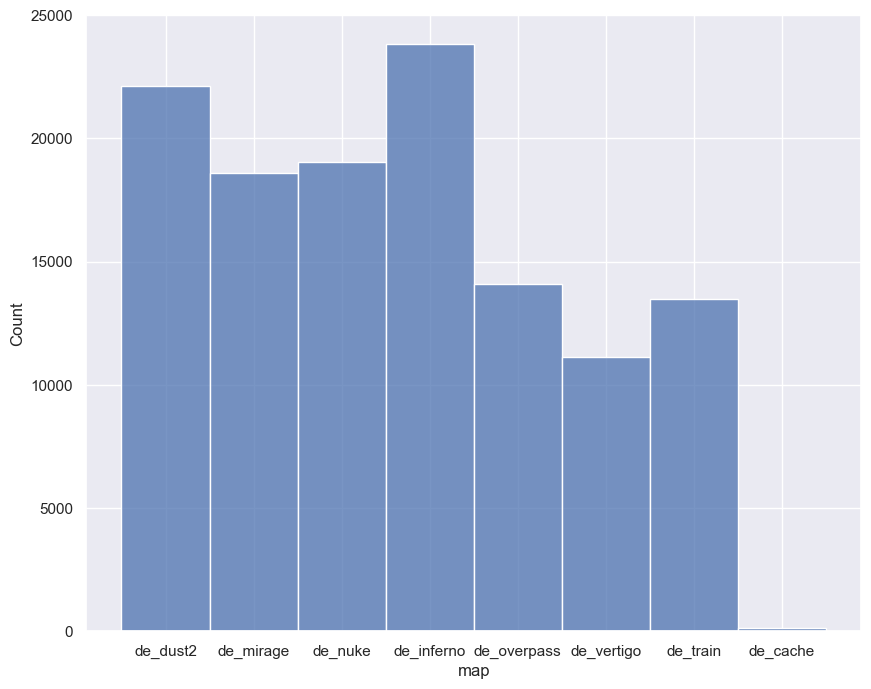

In [28]:
sn.histplot(x='map', data=df)

In [29]:
df_2 = df[['map','bomb_planted','round_winner']].copy() # we have 3 columns that have data that we can't use, so we need to modify this data

In [30]:
df_2.head()

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT


In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   map           122410 non-null  object
 1   bomb_planted  122410 non-null  bool  
 2   round_winner  122410 non-null  object
dtypes: bool(1), object(2)
memory usage: 2.0+ MB


In [33]:
df_2['round_winner'] = df_2['round_winner'].map({'CT':0, 'T':1})

In [34]:
df_2.head()

,map,bomb_planted,round_winner
0,de_dust2,False,0
1,de_dust2,False,0
2,de_dust2,False,0
3,de_dust2,False,0
4,de_dust2,False,0


In [35]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   map           122410 non-null  object
 1   bomb_planted  122410 non-null  bool  
 2   round_winner  122410 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ MB


In [36]:
df_2["bomb_planted"] = df_2["bomb_planted"].astype(int)


In [37]:
df_2.head()


,map,bomb_planted,round_winner
0,de_dust2,0,0
1,de_dust2,0,0
2,de_dust2,0,0
3,de_dust2,0,0
4,de_dust2,0,0


In [38]:
df_2=pd.get_dummies(df_2, columns=['map'])


In [39]:
df_2.head()

,bomb_planted,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [40]:
df['round_winner'] = df['round_winner'].map({'CT':0,'T':1})
df["bomb_planted"] = df["bomb_planted"].astype(int)
df=pd.get_dummies(df, columns=['map'])

In [41]:
df.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

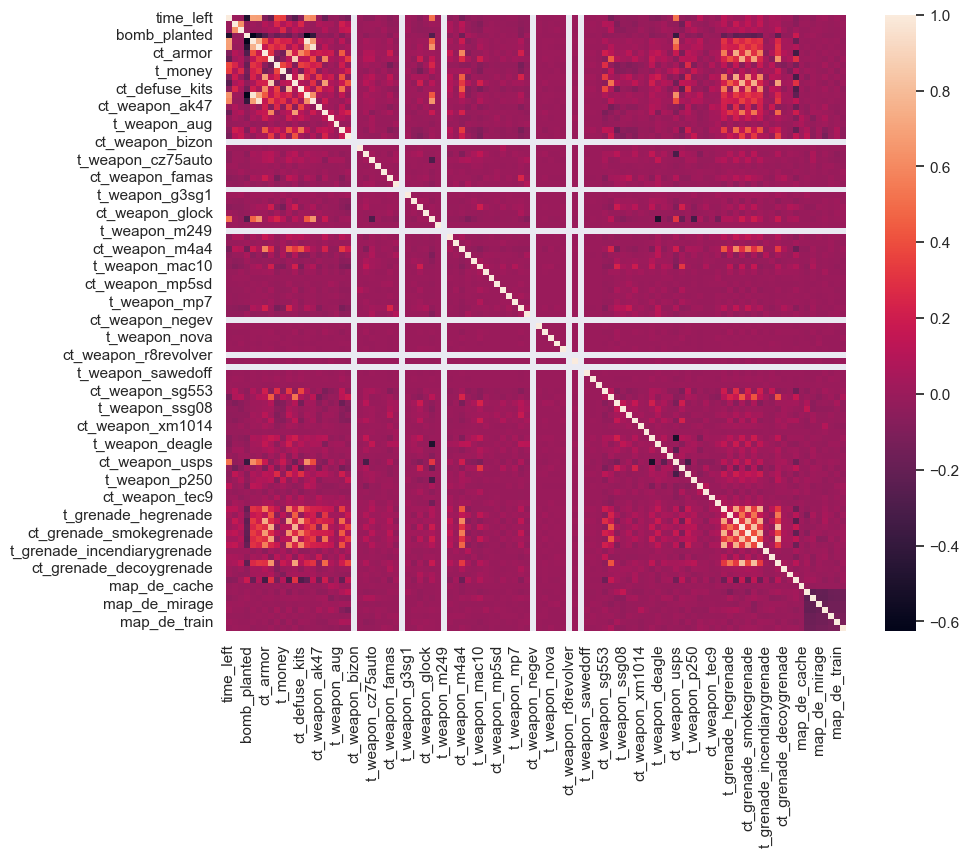

In [42]:
sn.heatmap(df.corr())


In [44]:
from sklearn.model_selection import *
from sklearn.metrics import *


from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [45]:
y = df["round_winner"]
X = df.drop(["round_winner"],axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
models=[]
models.append(LogisticRegression(solver='liblinear'))
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())

In [48]:
accuracy_models=[]
cross_val_scores=[]
for model in models:
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    accuracy_models.append(accuracy_score(y_test,y_hat))
    cross_val_scores.append(cross_val_score(model,X,y,cv=5,scoring='accuracy', n_jobs=-1).mean())

In [50]:
accuracy_models

[0.7490809574381178, 0.8250959888897966, 0.8820357813904093]

In [51]:
cross_val_scores

[0.7468670860223838, 0.7031615064128747, 0.7511232742423004]

In [52]:
results = {'Models': models,
          'Accuracy Score': accuracy_models,
          'Cross Validation Score': cross_val_scores}

results=pd.DataFrame(results)

In [53]:
results

,Models,Accuracy Score,Cross Validation Score
0,LogisticRegression(solver='liblinear'),0.749081,0.746867
1,DecisionTreeClassifier(),0.825096,0.703162
2,"(DecisionTreeClassifier(max_features='auto', r...",0.882036,0.751123


In [54]:
importances = models[2].feature_importances_
indices = np.argsort(importances)

In [55]:
importances

array([3.96651694e-02, 3.23319327e-02, 3.25511046e-02, 8.78352835e-03,
       3.20110378e-02, 3.22920202e-02, 7.39247709e-02, 7.32476742e-02,
       5.34755261e-02, 5.38707549e-02, 2.54734718e-02, 4.68647930e-02,
       3.44505998e-02, 1.91039304e-02, 2.10413220e-02, 8.11770663e-03,
       2.28236625e-02, 5.58037917e-03, 6.38544002e-04, 1.53837458e-02,
       6.97147764e-03, 0.00000000e+00, 6.86268253e-06, 5.61166886e-03,
       3.82496445e-03, 7.07245087e-04, 2.05955042e-04, 4.40832785e-03,
       2.46807615e-04, 0.00000000e+00, 5.32052789e-05, 6.94369027e-04,
       4.16783203e-03, 7.64635868e-04, 1.89874732e-02, 1.43159202e-06,
       0.00000000e+00, 3.59365186e-03, 2.18508554e-04, 1.81367498e-02,
       2.78940062e-03, 5.30481448e-04, 3.50187632e-03, 4.30768122e-04,
       6.83559249e-07, 1.34804849e-04, 1.58746962e-04, 3.03901967e-04,
       2.33766636e-04, 5.10637857e-03, 3.41615325e-04, 0.00000000e+00,
       0.00000000e+00, 1.57056521e-04, 1.00211793e-05, 1.52841225e-05,
      

In [56]:
indices

array([ 51,  52,  57,  36,  59,  29,  21,  62,  44,  58,  35,  22,  54,
        55,  60,  56,  70,  30,  61,  95,  45,  53,  46,  26,  38,  48,
        28,  47,  80,  50,  43,  41,  81,  74,  18,  31,  25,  69,  33,
        66,  90,  82,  68,  94,  65,  93,  91,  67,  40,  73,  42,  37,
        24,  32,  27,  76, 102,  49, 100, 101,  17,  23,  98,  99,  96,
        77,  97,  20,  63,  79,  72,  15,  78,   3,  71,  84,  89,  83,
        92,  88,  19,  64,  39,  75,  87,  34,  13,  14,  16,  86,  85,
        10,   4,   5,   1,   2,  12,   0,  11,   8,   9,   7,   6],
      dtype=int64)

In [57]:
X_train.columns[indices]

Index(['ct_weapon_negev', 't_weapon_negev', 'ct_weapon_r8revolver',
       't_weapon_m249', 'ct_weapon_sawedoff', 'ct_weapon_g3sg1',
       'ct_weapon_bizon', 't_weapon_scar20', 't_weapon_mag7',
       't_weapon_r8revolver',
       ...
       't_health', 'ct_score', 't_score', 'ct_defuse_kits', 'time_left',
       't_helmets', 'ct_money', 't_money', 't_armor', 'ct_armor'],
      dtype='object', length=103)

In [58]:
print(X_train.columns[indices][-1])
print(X_train.columns[indices][-2])
print(X_train.columns[indices][-3])
print(X_train.columns[indices][-4])
print(X_train.columns[indices][-5])

ct_armor
t_armor
t_money
ct_money
t_helmets


Text(0.5, 1.0, 'Importance of the Columns')

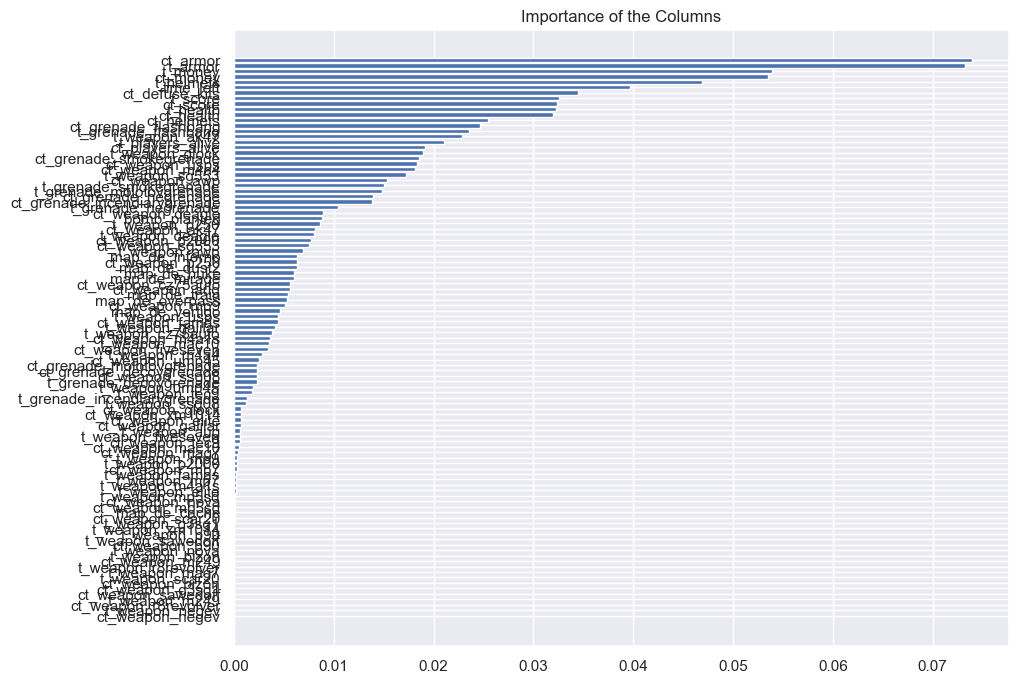

In [59]:
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.title('Importance of the Columns')

ModuleNotFoundError: No module named 'tensorflow'